In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\acer\\Downloads\\SeoulBikeData.csv")

In [3]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['Seasons'])],remainder='passthrough')
df=np.array(ct.fit_transform(df))

In [6]:
df1=pd.DataFrame(df)

In [7]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,1.0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes
1,0.0,0.0,0.0,1.0,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes
2,0.0,0.0,0.0,1.0,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes
3,0.0,0.0,0.0,1.0,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes
4,0.0,0.0,0.0,1.0,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.0,0.0,0.0,0.0,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,No Holiday,Yes
8756,1.0,0.0,0.0,0.0,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,No Holiday,Yes
8757,1.0,0.0,0.0,0.0,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,No Holiday,Yes
8758,1.0,0.0,0.0,0.0,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,No Holiday,Yes


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categories=[14,15]
for i in categories:
    label_encoder.fit(df1[i])
    df1[i] = label_encoder.transform(df1[i])
print(df1)

       0    1    2    3     4   5    6   7    8     9     10   11   12   13  \
0     0.0  0.0  0.0  1.0   254   0 -5.2  37  2.2  2000 -17.6  0.0  0.0  0.0   
1     0.0  0.0  0.0  1.0   204   1 -5.5  38  0.8  2000 -17.6  0.0  0.0  0.0   
2     0.0  0.0  0.0  1.0   173   2 -6.0  39  1.0  2000 -17.7  0.0  0.0  0.0   
3     0.0  0.0  0.0  1.0   107   3 -6.2  40  0.9  2000 -17.6  0.0  0.0  0.0   
4     0.0  0.0  0.0  1.0    78   4 -6.0  36  2.3  2000 -18.6  0.0  0.0  0.0   
...   ...  ...  ...  ...   ...  ..  ...  ..  ...   ...   ...  ...  ...  ...   
8755  1.0  0.0  0.0  0.0  1003  19  4.2  34  2.6  1894 -10.3  0.0  0.0  0.0   
8756  1.0  0.0  0.0  0.0   764  20  3.4  37  2.3  2000  -9.9  0.0  0.0  0.0   
8757  1.0  0.0  0.0  0.0   694  21  2.6  39  0.3  1968  -9.9  0.0  0.0  0.0   
8758  1.0  0.0  0.0  0.0   712  22  2.1  41  1.0  1859  -9.8  0.0  0.0  0.0   
8759  1.0  0.0  0.0  0.0   584  23  1.9  43  1.3  1909  -9.3  0.0  0.0  0.0   

      14  15  
0      1   1  
1      1   1  
2     

In [9]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,1.0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1
1,0.0,0.0,0.0,1.0,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,1
2,0.0,0.0,0.0,1.0,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,1.0,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,1.0,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.0,0.0,0.0,0.0,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,1
8756,1.0,0.0,0.0,0.0,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,1
8757,1.0,0.0,0.0,0.0,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,1
8758,1.0,0.0,0.0,0.0,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,1


In [10]:
for i in df1.columns:
  print(i,":",df1[i].value_counts())

0 : 0.0    6576
1.0    2184
Name: 0, dtype: int64
1 : 0.0    6552
1.0    2208
Name: 1, dtype: int64
2 : 0.0    6552
1.0    2208
Name: 2, dtype: int64
3 : 0.0    6600
1.0    2160
Name: 3, dtype: int64
4 : 0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: 4, Length: 2166, dtype: int64
5 : 0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: 5, dtype: int64
6 :  19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: 6, Length: 546, dtype: int64
7 : 53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: 7, Length: 90, dtype: int64
8 : 1.1    420
1.2    403
1.0    388
0.9   

In [11]:
target=df1[4]
df1=df1.drop(4,axis=1)

In [12]:
df1


,0,1,2,3,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,1.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1
1,0.0,0.0,0.0,1.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,1
2,0.0,0.0,0.0,1.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,1.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,1.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.0,0.0,0.0,0.0,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,1
8756,1.0,0.0,0.0,0.0,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,1
8757,1.0,0.0,0.0,0.0,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,1
8758,1.0,0.0,0.0,0.0,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,1


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, target, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components =10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 6)
reg1 = LinearRegression()
reg3= DecisionTreeRegressor(random_state = 0)
reg4= RandomForestRegressor(n_estimators = 15, random_state = 0)
clf=[reg1,reg3,reg4]
clf_list=['lr','dtr','rfr']
import time 
r_score={}
t={}
for model,model_name in zip(clf,clf_list):
    start=time.time()
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    et=time.time()
    r_score[model_name]=r2_score(y_test,pred)
    t[model_name]=et-start

In [17]:
for i,j in r_score.items():
    print(i,':',j)

lr : 0.5201752581855627
dtr : 0.6133895435940917
rfr : 0.7977862654804524


In [18]:
print(pred)

[ 219.53333333  474.93333333  390.73333333 ... 1146.33333333    0.
 1339.2       ]


In [19]:
print(y_test)

4059     320
6914     580
233      226
982      165
5967     646
        ... 
475      190
4732     317
4958    1016
8244       0
5246    1430
Name: 4, Length: 2190, dtype: object


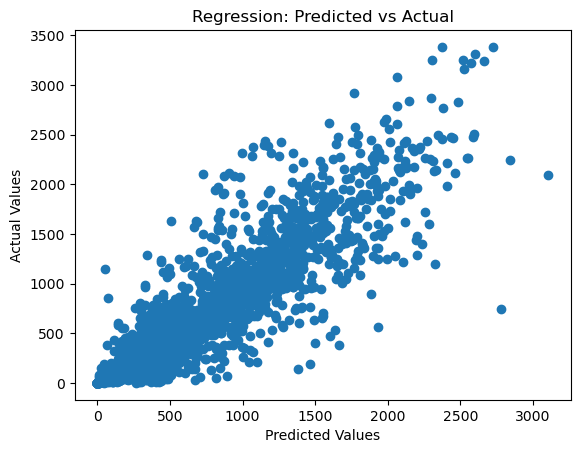

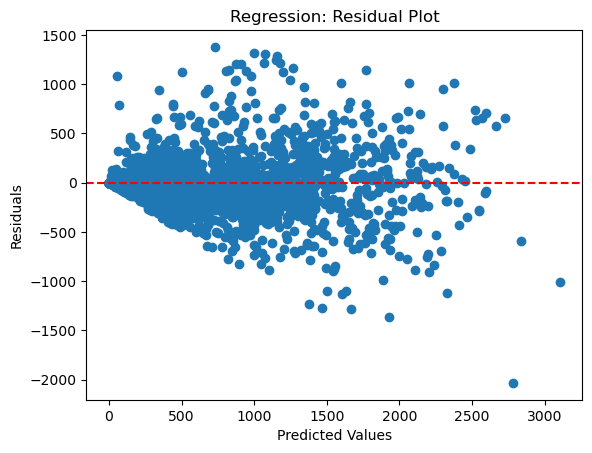

In [20]:
import matplotlib.pyplot as plt

# Assuming you have the predicted values in 'pred' and actual values in 'y_actual'

# Scatter Plot
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Regression: Predicted vs Actual')
plt.show()

# Residual Plot
residuals = y_test - pred
plt.scatter(pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Regression: Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0
plt.show()